In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plotting settings
sns.set()
%matplotlib inline

# Display
pd.set_option('display.max_rows', 999999)
pd.set_option('display.max_columns', 999999)
pd.set_option('display.width', 999999)

In [3]:
ds = pd.read_csv('./csse_covid_19_data/csse_covid_19_daily_reports/03-05-2020.csv')
ds.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-05T14:53:03,67466,2902,40592,30.9756,112.2707
1,NaN,South Korea,2020-03-05T09:03:09,6088,35,41,36.0000,128.0000
2,NaN,Italy,2020-03-05T17:43:03,3858,148,414,43.0000,12.0000
3,NaN,Iran,2020-03-05T13:43:04,3513,107,739,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-05T09:23:03,1351,7,1181,23.3417,113.4244


In [4]:
ds.shape

(173, 8)

# Coronavirus impact outside China barplots

In [5]:
#filtering dataframe for all countries outside China
covid_outside = ds[ds['Country/Region'] != 'Mainland China']
covid_outside

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1,NaN,South Korea,2020-03-05T09:03:09,6088,35,41,36.0000,128.0000
2,NaN,Italy,2020-03-05T17:43:03,3858,148,414,43.0000,12.0000
3,NaN,Iran,2020-03-05T13:43:04,3513,107,739,32.0000,53.0000
11,Diamond Princess cruise ship,Others,2020-03-03T03:13:06,706,6,10,35.4437,139.6380
15,NaN,Germany,2020-03-05T17:43:03,482,0,16,51.0000,9.0000
18,NaN,France,2020-03-05T15:13:22,377,6,12,47.0000,2.0000
19,NaN,Japan,2020-03-05T13:43:04,360,6,43,36.0000,138.0000
23,NaN,Spain,2020-03-05T17:43:03,259,3,2,40.0000,-4.0000
32,NaN,Singapore,2020-03-05T13:43:04,117,0,78,1.2833,103.8333
33,NaN,UK,2020-03-05T18:03:03,115,1,8,55.0000,-3.0000


In [6]:
#making the country the index of the dataframe
covid_outside = covid_outside.pivot_table(index=['Country/Region'], 
                                     values = ['Confirmed', 'Deaths', 'Recovered'],
                                    aggfunc='max')
covid_outside.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,1,0,0
Algeria,12,0,0
Andorra,1,0,0
Argentina,1,0,0
Armenia,1,0,0


In [7]:
covid_outside_top = covid_outside.sort_values(by ='Confirmed').nlargest(20, 'Confirmed')
covid_outside_top

,Confirmed,Deaths,Recovered
Country/Region,,,
South Korea,6088,35,41
Italy,3858,148,414
Iran,3513,107,739
Others,706,6,10
Germany,482,0,16
France,377,6,12
Japan,360,6,43
Spain,259,3,2
Singapore,117,0,78


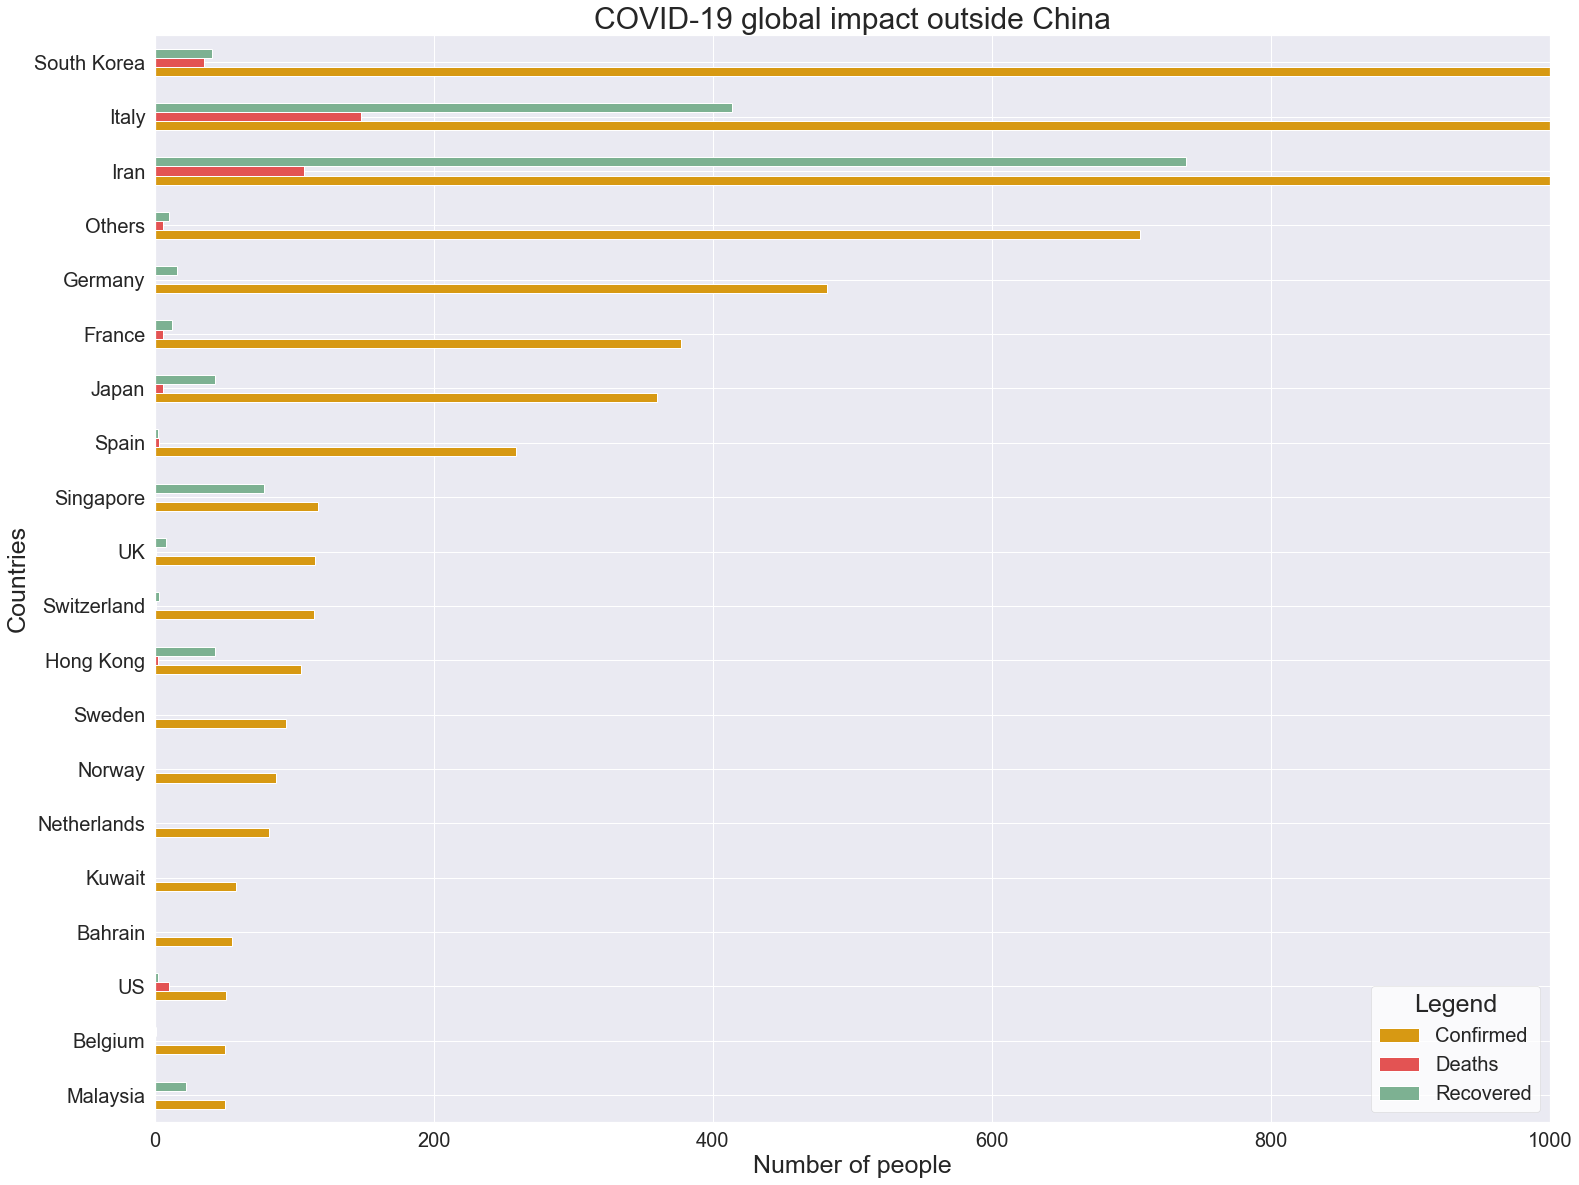

In [8]:
covid_outside_top.sort_values(by=['Confirmed'], ascending=True).plot.barh(figsize = (25, 20), 
                                                                               width=0.5, 
                                                                               align='center', 
                                                                               color = ['#D79913', 
                                                                                        '#E35353', 
                                                                                        '#7DB192'])
plt.xlabel('Number of people', fontsize=25)
plt.ylabel('Countries', fontsize=25)
plt.title('COVID-19 global impact outside China', fontsize=30)


plt.xlim(0, 1000)
plt.style.use('ggplot')

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('covid_global_outside.jpg', dpi=540)
plt.show()

# Coronavirus impact inside China barplot

In [9]:
ds_china = ds.pivot_table(index=['Province/State'], values = ['Country/Region','Confirmed', 'Deaths', 'Recovered'],
                                     aggfunc='max')

ds_china = ds_china[ds_china['Country/Region'] == 'Mainland China'].nlargest(10, 'Deaths')
ds_china

,Confirmed,Country/Region,Deaths,Recovered
Province/State,,,,
Hubei,67466,Mainland China,2902,40592
Henan,1272,Mainland China,22,1239
Heilongjiang,481,Mainland China,13,379
Beijing,418,Mainland China,8,297
Guangdong,1351,Mainland China,7,1181
Anhui,990,Mainland China,6,970
Chongqing,576,Mainland China,6,512
Hainan,168,Mainland China,6,158
Hebei,318,Mainland China,6,304


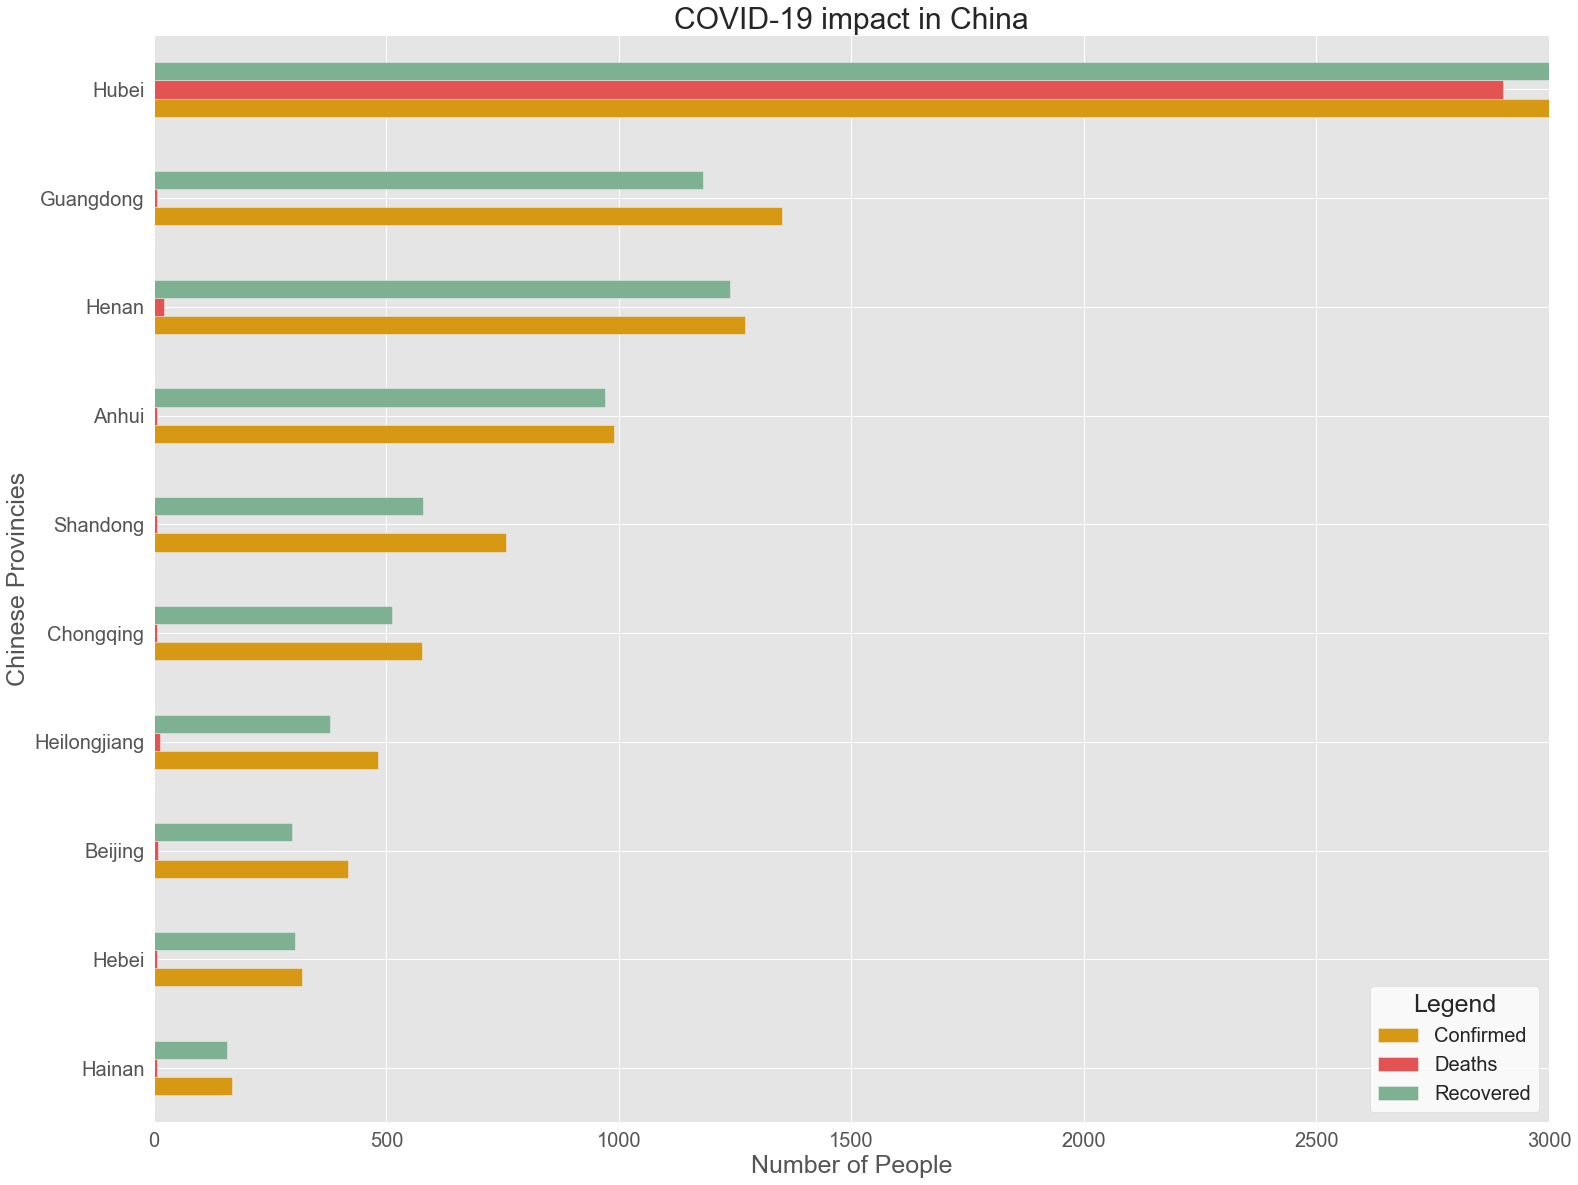

In [10]:
ds_china.sort_values(by=['Confirmed'], ascending=True).plot.barh(figsize = (25, 20), 
                                                              width=0.5, align='center', 
                                                              color = ['#D79913', 
                                                                       '#E35353', 
                                                                       '#7DB192'])

plt.ylabel('Chinese Provincies', fontsize=25)
plt.xlabel('Number of People', fontsize=25)
plt.title('COVID-19 impact in China', fontsize=30)

plt.xlim(0, 3000)
plt.style.use('ggplot')

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('covid_in_China_.jpg', dpi=540)
plt.show()

# Time series analysis

In [11]:
confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [12]:
deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [13]:
recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [14]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,7,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [15]:
#looking at the number of rows and columns
deaths.shape

(173, 48)

In [16]:
deaths = deaths.groupby(['Country/Region']).sum()

In [17]:
deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#removing latitude and longitude columns
deaths.drop(columns = ['Lat', 'Long'], axis=1, inplace=True)

In [19]:
#sorting dataframe of top countries affected in descending order
deaths = deaths.sort_values(by=deaths.columns[-1], ascending = False)
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mainland China,17,18,26,42,56,82,131,133,171,213,259,361,425,490,562,632,717,804,904,1011,1111,1116,1368,1520,1662,1765,1863,2002,2114,2236,2236,2441,2443,2593,2663,2715,2744,2788,2835,2870,2912,2945,2981,3013
Italy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,34,52,79,107,148
Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,5,8,12,16,19,26,34,43,54,66,77,92,107
South Korea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,17,28,28,35,35
US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,7,11,12


In [20]:
#making date as index of dataframe to be used later on graphs
deaths_t = deaths.transpose()

In [21]:
deaths_t.head()

Country/Region,Mainland China,Italy,Iran,South Korea,US,Others,Japan,France,Spain,Australia,Hong Kong,Iraq,Switzerland,San Marino,Taiwan,Thailand,UK,Philippines,Oman,Norway,Afghanistan,New Zealand,North Macedonia,Nigeria,Netherlands,Nepal,Morocco,Monaco,Mexico,Pakistan,Qatar,Palestine,Slovenia,United Arab Emirates,Ukraine,Tunisia,Sweden,Sri Lanka,South Africa,Singapore,Poland,Senegal,Saudi Arabia,Saint Barthelemy,Russia,Romania,Portugal,Malaysia,Liechtenstein,Macau,Egypt,Dominican Republic,Denmark,Czech Republic,Croatia,Chile,Canada,Cambodia,Brazil,Bosnia and Herzegovina,Belgium,Belarus,Bahrain,Azerbaijan,Austria,Armenia,Argentina,Andorra,Ecuador,Estonia,Luxembourg,Faroe Islands,Lithuania,Algeria,Lebanon,Latvia,Kuwait,Jordan,Israel,Ireland,Indonesia,India,Iceland,Hungary,Greece,Gibraltar,Germany,Georgia,Finland,Vietnam
1/22/20,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# changing date format for better graphic visualisation of date
from datetime import datetime

In [23]:
deaths_t.index[1]

'1/23/20'

In [24]:
#converting index str type to dateime
deaths_t.index = pd.to_datetime(deaths_t.index).strftime('%d-%b-%Y')

In [25]:
deaths_t.tail(10)

Country/Region,Mainland China,Italy,Iran,South Korea,US,Others,Japan,France,Spain,Australia,Hong Kong,Iraq,Switzerland,San Marino,Taiwan,Thailand,UK,Philippines,Oman,Norway,Afghanistan,New Zealand,North Macedonia,Nigeria,Netherlands,Nepal,Morocco,Monaco,Mexico,Pakistan,Qatar,Palestine,Slovenia,United Arab Emirates,Ukraine,Tunisia,Sweden,Sri Lanka,South Africa,Singapore,Poland,Senegal,Saudi Arabia,Saint Barthelemy,Russia,Romania,Portugal,Malaysia,Liechtenstein,Macau,Egypt,Dominican Republic,Denmark,Czech Republic,Croatia,Chile,Canada,Cambodia,Brazil,Bosnia and Herzegovina,Belgium,Belarus,Bahrain,Azerbaijan,Austria,Armenia,Argentina,Andorra,Ecuador,Estonia,Luxembourg,Faroe Islands,Lithuania,Algeria,Lebanon,Latvia,Kuwait,Jordan,Israel,Ireland,Indonesia,India,Iceland,Hungary,Greece,Gibraltar,Germany,Georgia,Finland,Vietnam
25-Feb-2020,2663,10,16,10,0,3,1,1,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26-Feb-2020,2715,12,19,12,0,4,2,2,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27-Feb-2020,2744,17,26,13,0,4,4,2,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28-Feb-2020,2788,21,34,13,0,6,4,2,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29-Feb-2020,2835,29,43,16,1,6,5,2,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-Mar-2020,2870,34,54,17,1,6,6,2,0,1,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
02-Mar-2020,2912,52,66,28,6,6,6,3,0,1,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
03-Mar-2020,2945,79,77,28,7,6,6,4,1,1,2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
04-Mar-2020,2981,107,92,35,11,6,6,4,2,2,2,2,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
05-Mar-2020,3013,148,107,35,12,6,6,6,3,2,2,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Plotting deaths evolution in Europe

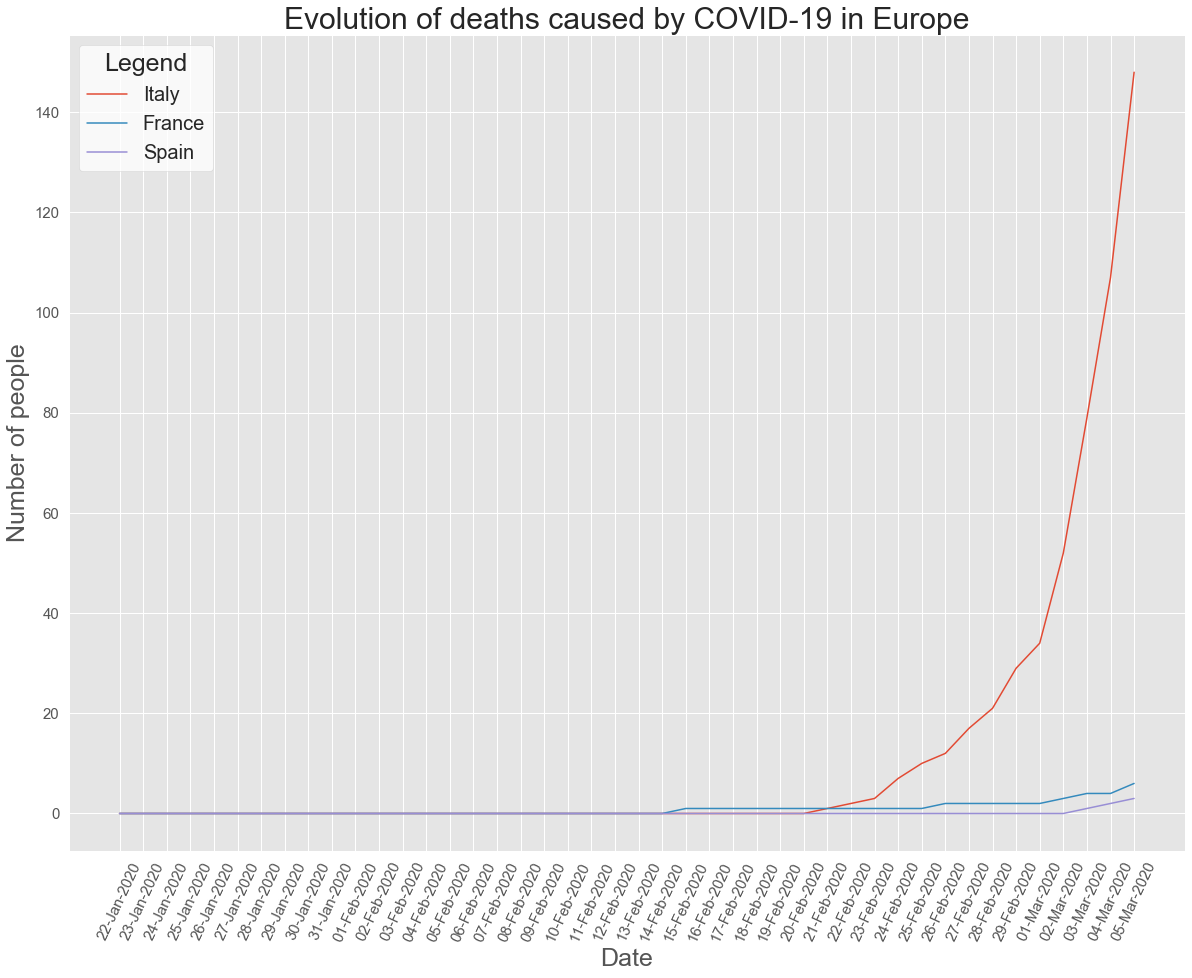

In [26]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.ylabel('Number of people', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Evolution of deaths caused by COVID-19 in Europe', fontsize=30)

ax.plot(deaths_t.index,deaths_t.Italy, label = 'Italy')
ax.plot(deaths_t.index,deaths_t.France, label = 'France')
ax.plot(deaths_t.index,deaths_t.Spain, label = 'Spain')

plt.style.use('ggplot')
plt.xticks(fontsize=15, rotation=65)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='major')

ax.get_legend_handles_labels()
ax.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('deaths_covid_evolution_Europe.jpg', dpi=480)
plt.show()

# Plotting confirmed cases evolution in Europe

In [27]:
confirmed = confirmed.groupby(['Country/Region']).sum()

In [28]:
confirmed.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [29]:
#removing latitude and longitude columns
confirmed.drop(columns = ['Lat', 'Long'], axis=1, inplace=True)

In [30]:
#sorting dataframe of top countries affected in descending order
confirmed = confirmed.sort_values(by=confirmed.columns[-1], ascending = False)
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mainland China,547,639,916,1399,2062,2863,5494,6070,8124,9783,11871,16607,19693,23680,27409,30553,34075,36778,39790,42306,44327,44699,59832,66292,68347,70446,72364,74139,74546,74999,75472,76922,76938,77152,77660,78065,78498,78824,79251,79826,80026,80151,80271,80422
South Korea,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858
Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513
Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,61,64,135,135,175,175,218,285,355,454,542,621,634,634,634,691,691,691,705,705,705,705,705,705,706,706,706


In [31]:
#making date as index of dataframe to be used later on graphs
confirmed_t = confirmed.transpose()

In [32]:
confirmed_t.head()

Country/Region,Mainland China,South Korea,Italy,Iran,Others,Germany,France,Japan,Spain,US,Singapore,UK,Switzerland,Hong Kong,Sweden,Norway,Netherlands,Kuwait,Bahrain,Australia,Malaysia,Belgium,Thailand,Taiwan,Austria,Canada,Iraq,Iceland,Greece,India,United Arab Emirates,San Marino,Vietnam,Lebanon,Oman,Israel,Ecuador,Finland,Czech Republic,Algeria,Croatia,Macau,Denmark,Portugal,Qatar,Belarus,Romania,Ireland,Azerbaijan,Saudi Arabia,Mexico,Pakistan,Senegal,Palestine,Russia,Brazil,Georgia,Chile,New Zealand,Philippines,Egypt,Estonia,Saint Barthelemy,Slovenia,Bosnia and Herzegovina,Morocco,Indonesia,Hungary,South Africa,Ukraine,Sri Lanka,Tunisia,Afghanistan,Poland,Gibraltar,Andorra,Argentina,Armenia,Cambodia,Dominican Republic,Faroe Islands,Jordan,North Macedonia,Latvia,Lithuania,Luxembourg,Monaco,Nepal,Nigeria,Liechtenstein
1/22/20,547,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,639,1,0,0,0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,916,2,0,0,0,0,2,2,0,2,3,0,0,2,0,0,0,0,0,0,0,0,5,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,1399,2,0,0,0,0,3,2,0,2,3,0,0,5,0,0,0,0,0,0,3,0,7,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1/26/20,2062,3,0,0,0,0,3,4,0,5,4,0,0,8,0,0,0,0,0,4,4,0,8,4,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
confirmed_t.index[1]

'1/23/20'

In [34]:
#converting index str type to dateime
confirmed_t.index = pd.to_datetime(confirmed_t.index).strftime('%d-%b-%Y')

In [35]:
confirmed_t.tail(10)

Country/Region,Mainland China,South Korea,Italy,Iran,Others,Germany,France,Japan,Spain,US,Singapore,UK,Switzerland,Hong Kong,Sweden,Norway,Netherlands,Kuwait,Bahrain,Australia,Malaysia,Belgium,Thailand,Taiwan,Austria,Canada,Iraq,Iceland,Greece,India,United Arab Emirates,San Marino,Vietnam,Lebanon,Oman,Israel,Ecuador,Finland,Czech Republic,Algeria,Croatia,Macau,Denmark,Portugal,Qatar,Belarus,Romania,Ireland,Azerbaijan,Saudi Arabia,Mexico,Pakistan,Senegal,Palestine,Russia,Brazil,Georgia,Chile,New Zealand,Philippines,Egypt,Estonia,Saint Barthelemy,Slovenia,Bosnia and Herzegovina,Morocco,Indonesia,Hungary,South Africa,Ukraine,Sri Lanka,Tunisia,Afghanistan,Poland,Gibraltar,Andorra,Argentina,Armenia,Cambodia,Dominican Republic,Faroe Islands,Jordan,North Macedonia,Latvia,Lithuania,Luxembourg,Monaco,Nepal,Nigeria,Liechtenstein
25-Feb-2020,77660,977,322,95,691,17,14,170,6,53,91,13,1,84,1,0,0,11,23,22,22,1,37,31,2,11,1,0,0,3,13,0,16,1,2,1,0,1,0,1,1,10,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
26-Feb-2020,78065,1261,453,139,705,27,18,189,13,59,93,13,1,91,2,1,0,26,33,22,22,1,40,32,2,11,5,0,1,3,13,0,16,2,4,2,0,2,0,1,3,10,0,0,0,0,1,0,0,0,0,2,0,0,2,1,1,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
27-Feb-2020,78498,1766,655,245,705,46,38,214,15,60,93,15,8,92,7,1,1,43,33,23,23,1,40,32,3,13,7,0,3,3,13,1,16,2,4,3,0,2,0,1,3,10,1,0,0,0,1,0,0,0,0,2,0,0,2,1,1,0,0,3,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
28-Feb-2020,78824,2337,888,388,705,48,57,228,32,62,93,20,8,94,7,6,1,45,36,23,23,1,41,34,3,14,7,1,4,3,19,1,16,2,4,4,0,2,0,1,5,10,1,0,0,1,3,0,0,0,1,2,0,0,2,1,1,0,1,3,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0
29-Feb-2020,79251,3150,1128,593,705,79,100,241,45,70,102,23,18,95,12,15,6,45,41,25,25,1,42,39,9,20,13,1,4,3,21,1,16,4,6,7,0,3,0,1,6,10,3,0,1,1,3,1,0,0,4,4,0,0,2,2,1,0,1,3,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0
01-Mar-2020,79826,3736,1694,978,705,130,130,256,84,76,106,36,27,96,14,19,10,45,47,27,29,2,42,40,14,24,19,3,7,3,21,1,16,10,6,10,6,6,3,1,7,10,4,0,3,1,3,1,3,0,5,4,0,0,2,2,3,0,1,3,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,0
02-Mar-2020,80026,4335,2036,1501,705,159,191,274,120,101,108,40,42,100,15,25,18,56,49,30,29,8,43,41,18,27,26,6,7,5,21,8,16,13,6,10,6,6,3,3,7,10,4,2,3,1,3,1,3,1,5,4,1,0,3,2,3,0,1,3,2,1,0,0,0,1,2,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0
03-Mar-2020,80151,5186,2502,2336,706,196,204,293,165,122,110,51,56,100,21,32,24,56,49,39,36,13,43,42,21,30,32,11,7,5,27,10,16,13,12,12,7,6,5,5,9,10,6,2,7,1,3,2,3,1,5,5,2,0,3,2,3,1,1,3,2,2,0,0,0,1,2,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
04-Mar-2020,80271,5621,3089,2922,706,262,285,331,222,153,110,85,90,105,35,56,38,56,52,52,50,23,43,42,29,33,35,26,9,28,27,16,16,13,15,15,10,6,8,12,10,10,10,5,8,6,4,6,3,1,5,5,4,0,3,4,3,1,3,3,2,2,3,0,0,1,2,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
05-Mar-2020,80422,6088,3858,3513,706,482,377,360,259,221,117,115,114,105,94,87,82,58,55,55,50,50,47,44,41,37,35,34,31,30,29,21,16,16,16,16,13,12,12,12,10,10,10,8,8,6,6,6,6,5,5,5,4,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


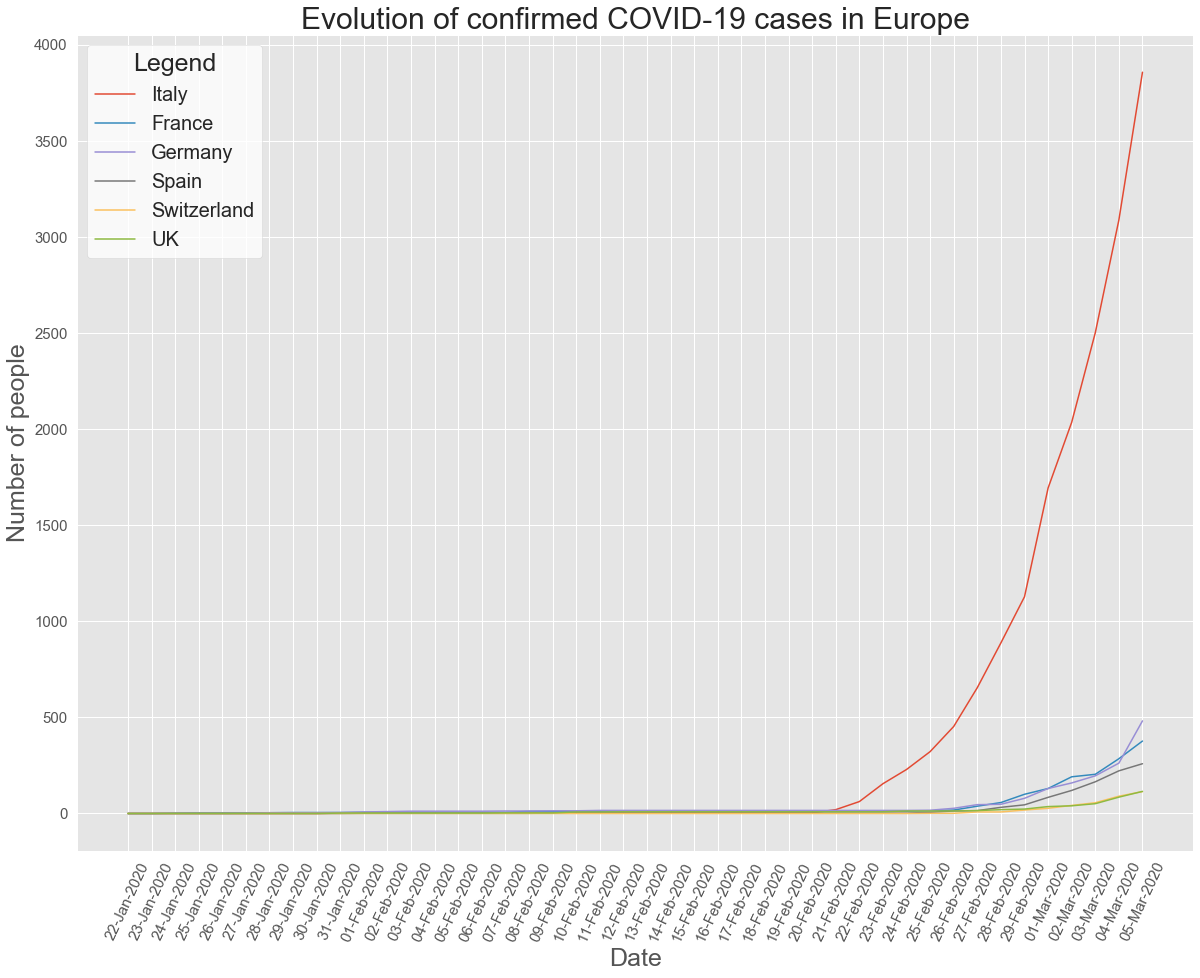

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.ylabel('Number of people', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Evolution of confirmed COVID-19 cases in Europe', fontsize=30)

ax.plot(confirmed_t.index,confirmed_t.Italy, label = 'Italy')
ax.plot(confirmed_t.index,confirmed_t.France, label = 'France')
ax.plot(confirmed_t.index,confirmed_t.Germany, label = 'Germany')
ax.plot(confirmed_t.index,confirmed_t.Spain, label = 'Spain')
ax.plot(confirmed_t.index,confirmed_t.Switzerland, label = 'Switzerland')
ax.plot(confirmed_t.index,confirmed_t.UK, label = 'UK')

plt.style.use('ggplot')
plt.xticks(fontsize=15, rotation=65)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='major')

ax.get_legend_handles_labels()
ax.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('confirmed_covid_evolution_Europe.jpg', dpi=540)
plt.show()

# GeoPandas visualisation 

In [37]:
#importing world map template
world_map = gpd.read_file('./Countries_WGS84/Countries_WGS84.shp')

In [38]:
# designate coordinate system
crs = {'init' :'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(ds['Longitude'], ds['Latitude'])]

# create GeoPandas dataframe
geo_ds = gpd.GeoDataFrame(ds, crs = crs, geometry = geometry)

/Applications/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [39]:
geo_ds

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
0,Hubei,Mainland China,2020-03-05T14:53:03,67466,2902,40592,30.9756,112.2707,POINT (112.27070 30.97560)
1,NaN,South Korea,2020-03-05T09:03:09,6088,35,41,36.0000,128.0000,POINT (128.00000 36.00000)
2,NaN,Italy,2020-03-05T17:43:03,3858,148,414,43.0000,12.0000,POINT (12.00000 43.00000)
3,NaN,Iran,2020-03-05T13:43:04,3513,107,739,32.0000,53.0000,POINT (53.00000 32.00000)
4,Guangdong,Mainland China,2020-03-05T09:23:03,1351,7,1181,23.3417,113.4244,POINT (113.42440 23.34170)
5,Henan,Mainland China,2020-03-05T01:48:26,1272,22,1239,33.8820,113.6140,POINT (113.61400 33.88200)
6,Zhejiang,Mainland China,2020-03-05T09:43:03,1215,1,1124,29.1832,120.0934,POINT (120.09340 29.18320)
7,Hunan,Mainland China,2020-03-05T08:43:03,1018,4,938,27.6104,111.7088,POINT (111.70880 27.61040)
8,Anhui,Mainland China,2020-03-05T04:33:02,990,6,970,31.8257,117.2264,POINT (117.22640 31.82570)
9,Jiangxi,Mainland China,2020-03-05T01:16:58,935,1,901,27.6140,115.7221,POINT (115.72210 27.61400)


In [40]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

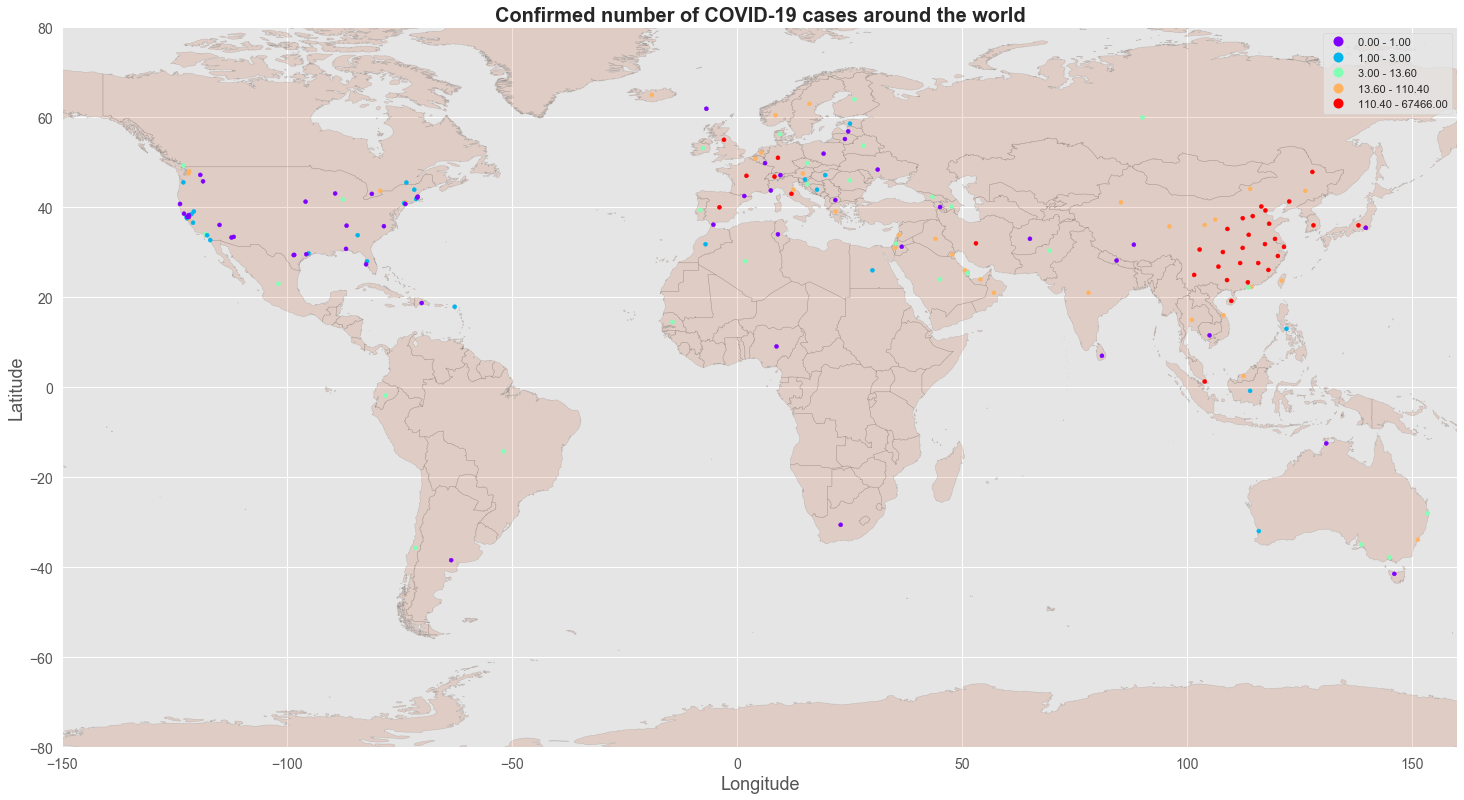

In [44]:
fig, ax = plt.subplots(figsize=(25,20))

world_map.plot(ax=ax, alpha=0.15, color='#C24813', edgecolor='black')

geo_ds.plot(column='Confirmed', ax=ax, markersize=16, 
            legend=True, 
            categorical=False, 
            scheme='Quantiles',
            cmap='rainbow')

plt.xlim(-150,160)
plt.ylim(-80,80)
plt.title('Confirmed number of COVID-19 cases around the world', fontsize=20, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('covid_global_map_confirmed.jpg', dpi=540)
plt.show()

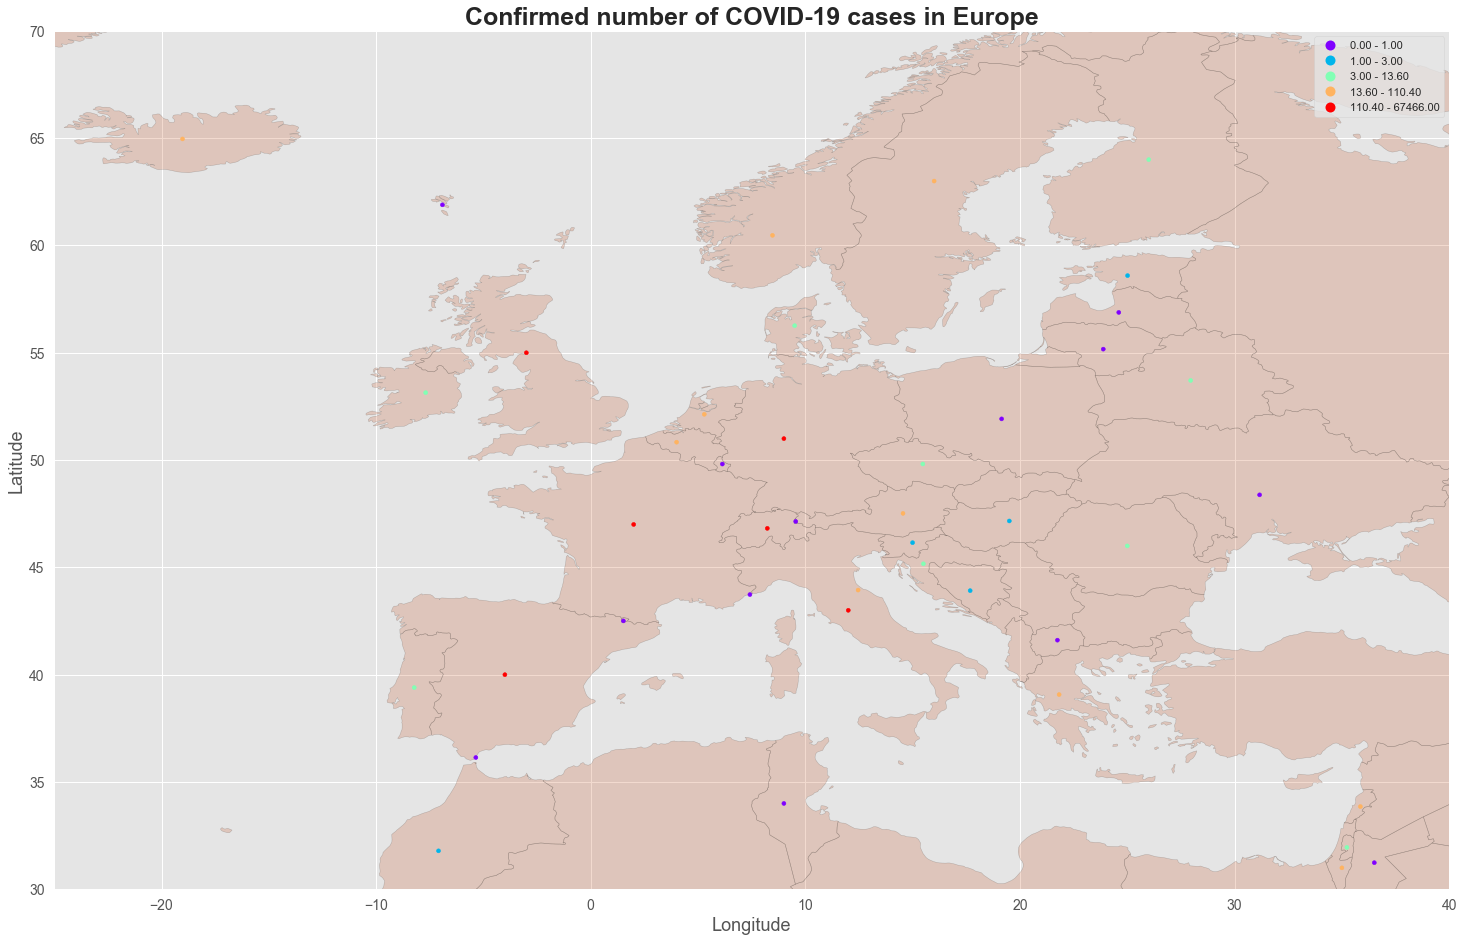

In [51]:
#plotting confirmed cases in Europe

fig, ax = plt.subplots(figsize=(25,20))

world_map.plot(ax=ax, alpha=0.2, color='#C24813', edgecolor='black')

geo_ds.plot(column='Confirmed', ax=ax, markersize=16, 
            legend=True, 
            categorical=False, 
            scheme='Quantiles',
            cmap='rainbow')

plt.xlim(-25,40)
plt.ylim(30,70)
plt.title('Confirmed number of COVID-19 cases in Europe', fontsize=25, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('covid_europe_map_confirmed.jpg', dpi=540)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Applications/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


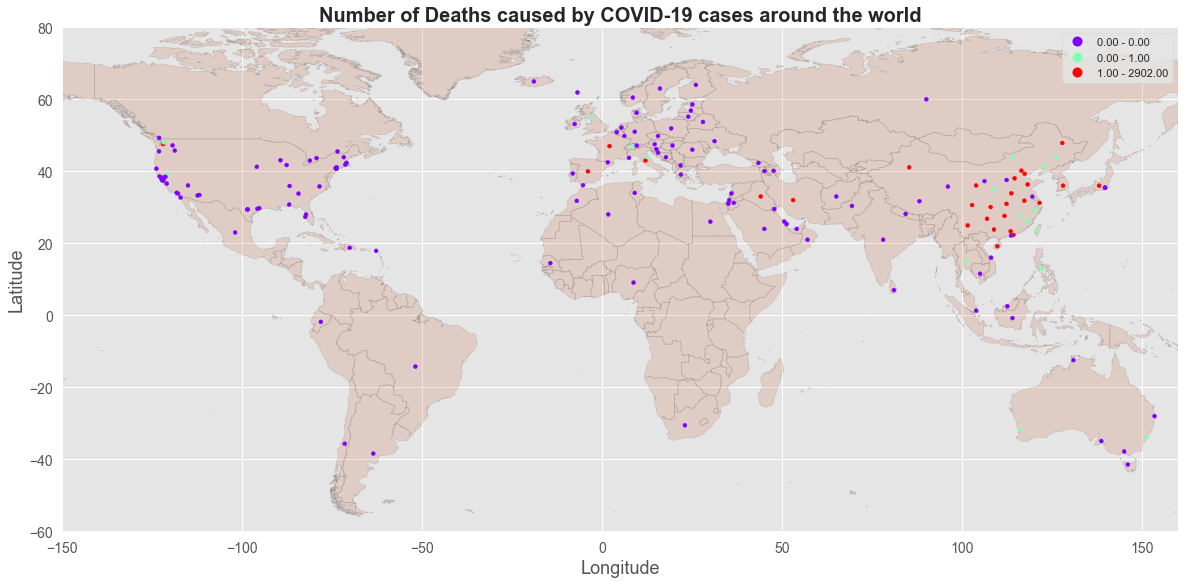

In [53]:
fig, ax = plt.subplots(figsize=(20,15))

world_map.plot(ax=ax, alpha=0.15, color='#C24813', edgecolor='black')

geo_ds.plot(column='Deaths', ax=ax, markersize=15, 
            legend=True, 
            categorical=False, 
            scheme='Quantiles',
            cmap='rainbow')

plt.xlim(-150,160)
plt.ylim(-60,80)
plt.title('Number of Deaths caused by COVID-19 cases around the world', fontsize=20, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('covid_global_map_deaths.jpg', dpi=540)
plt.show()